## Final Project: Restaurant Recommender System - Yelp Data (EDA)
##### Natalie Kim

### Read Data

In [2]:
# Libraries
import json
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_file = open("/Users/nataliekim/Downloads/yelp_dataset/yelp_academic_dataset_business.json")
data = []
for line in data_file:   
    data.append(json.loads(line))

business_df = pd.DataFrame(data)
data_file.close()

In [13]:
data_file = open("/Users/nataliekim/Downloads/yelp_dataset/yelp_academic_dataset_review.json")
data = []
for line in data_file:   
    data.append(json.loads(line))

reviews_df = pd.DataFrame(data)
data_file.close()

In [8]:
data_file = open("/Users/nataliekim/Downloads/yelp_dataset/yelp_academic_dataset_user.json")
data = []
for line in data_file:   
    data.append(json.loads(line))

users_df = pd.DataFrame(data)
data_file.close()

In [3]:
business_df.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [13]:
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150346 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


In [ ]:
reviews_df.head(5)

In [14]:
reviews_df.columns.values.tolist()

['review_id',
 'user_id',
 'business_id',
 'stars',
 'useful',
 'funny',
 'cool',
 'text',
 'date']

In [9]:
users_df.head(5)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


#### EDA

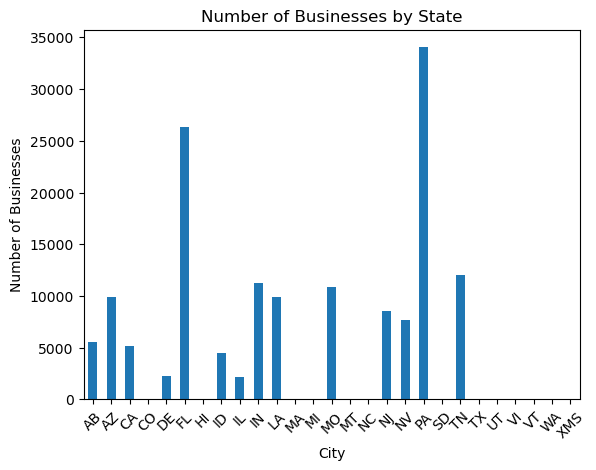

In [4]:
# number of businesses by state
numBus = business_df.groupby('state').size()

# plot as bar chart
numBus.plot(kind='bar')
plt.title('Number of Businesses by State')
plt.xlabel('City')
plt.ylabel('Number of Businesses')
plt.xticks(rotation=45)
plt.show()

The total Yelp dataset has a lot of data. In order to simplify, we will look at just PA has the largest numer of businesses. Now, we'll see if they also have a large number of restaurants.

In [4]:
# Fill NaN values in the 'categories' column with an empty string
business_df['categories'] = business_df['categories'].fillna('')

# all restaurants
restaurants = business_df[business_df['categories'].str.contains('Restaurant')]
restaurants

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150325,l9eLGG9ZKpLJzboZq-9LRQ,Wawa,19 N Bishop Ave,Clifton Heights,PA,19018,39.925656,-75.310344,3.0,11,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Restaurants, Sandwiches, Convenience Stores, C...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
150327,cM6V90ExQD6KMSU3rRB5ZA,Dutch Bros Coffee,1181 N Milwaukee St,Boise,ID,83704,43.615401,-116.284689,4.0,33,1,"{'WiFi': ''free'', 'RestaurantsGoodForGroups':...","Cafes, Juice Bars & Smoothies, Coffee & Tea, R...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-17:0', '..."
150336,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,1108 S 9th St,Philadelphia,PA,19147,39.935982,-75.158665,4.5,35,1,"{'WheelchairAccessible': 'False', 'Restaurants...","Restaurants, Mexican","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
150339,2O2K6SXPWv56amqxCECd4w,The Plum Pit,4405 Pennell Rd,Aston,DE,19014,39.856185,-75.427725,4.5,14,1,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Restaurants, Comfort Food, Food, Food Trucks, ...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."


In [10]:
restcount_by_state = restaurants.groupby('state').size().reset_index(name='count')
restcount_by_state=restcount_by_state.sort_values(by='count', ascending=False)

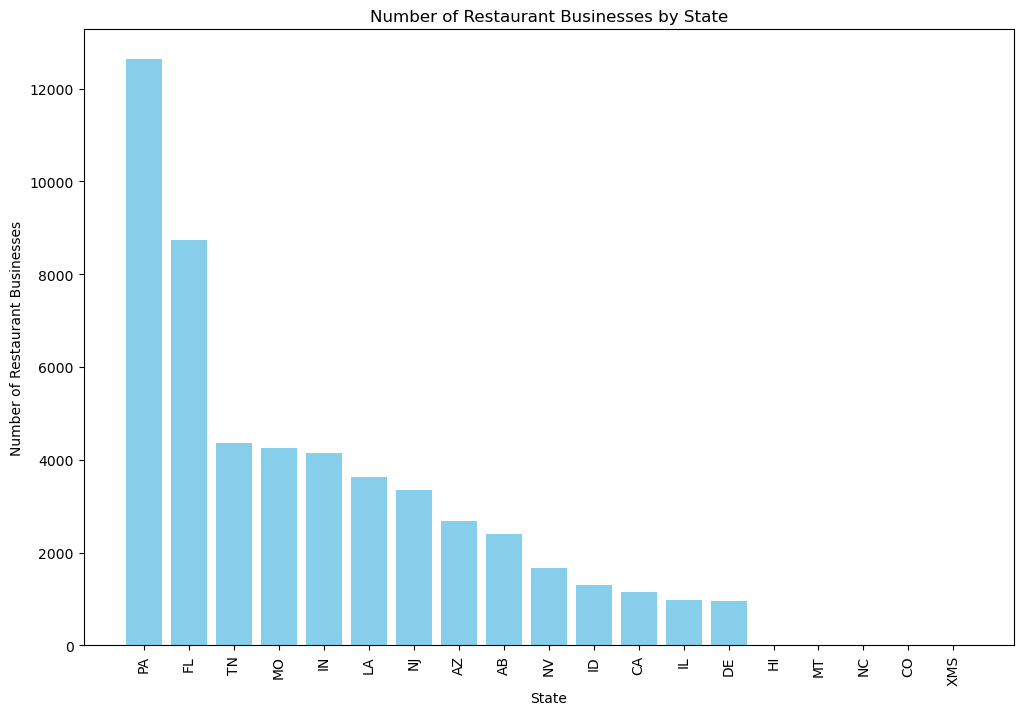

In [12]:
# plot bar chart of restaurants by state
plt.figure(figsize=(12, 8))
plt.bar(restcount_by_state['state'], restcount_by_state['count'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Number of Restaurant Businesses')
plt.title('Number of Restaurant Businesses by State')
plt.xticks(rotation=90)
plt.show()

In [5]:
restcount_by_city = restaurants.groupby('city').size().reset_index(name='count')
restcount_by_city=restcount_by_city.sort_values(by='count', ascending=False)

In [7]:
restcount_by_city

,city,count
577,Philadelphia,5854
761,Tampa,2961
344,Indianapolis,2862
508,Nashville,2503
801,Tucson,2470
...,...,...
153,Corona de Tucson,1
532,North Redington Bch,1
531,North Coventry Township,1
525,Newtown Sqaure,1


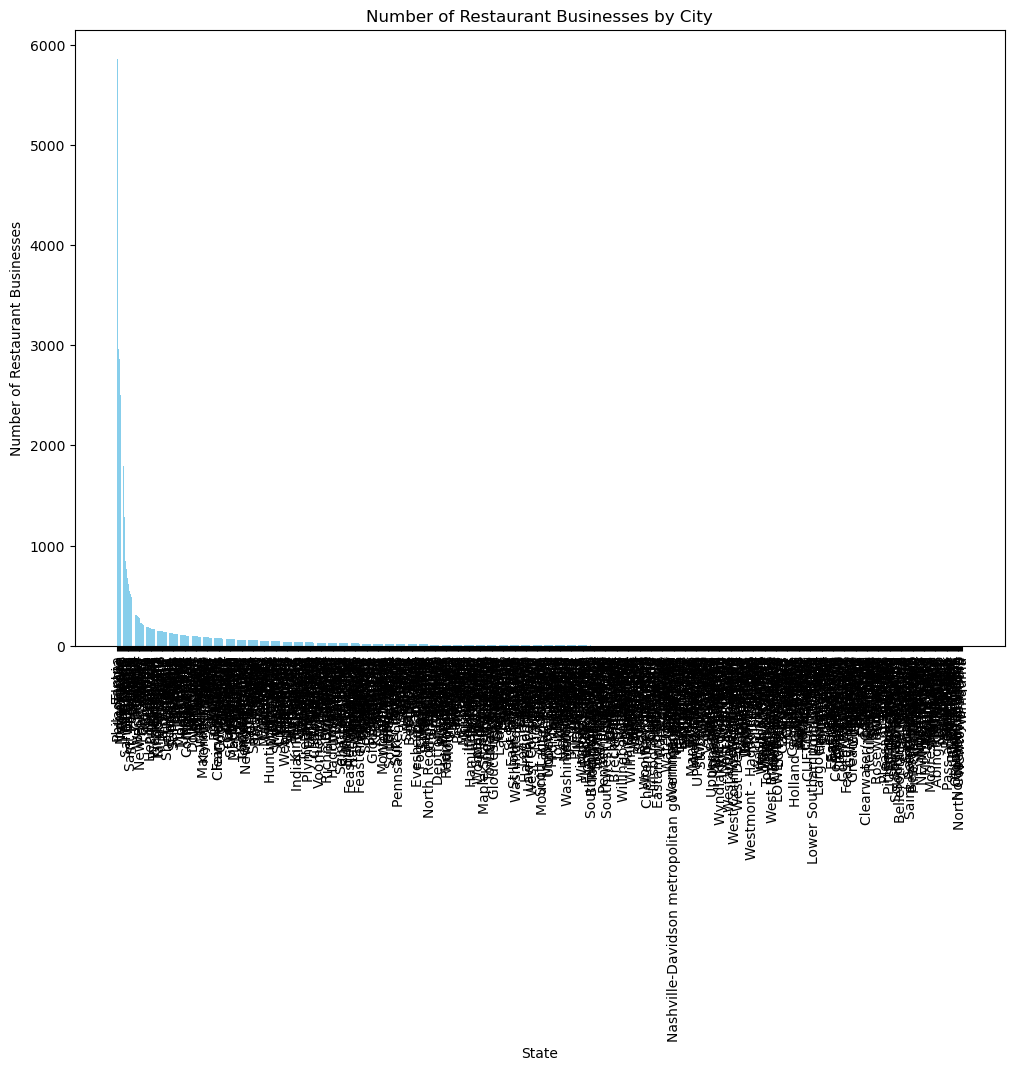

In [6]:
# plot bar chart of restaurants by state
plt.figure(figsize=(12, 8))
plt.bar(restcount_by_city['city'], restcount_by_city['count'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Number of Restaurant Businesses')
plt.title('Number of Restaurant Businesses by City')
plt.xticks(rotation=90)
plt.show()

##### EDA of Reviews

In [16]:
reviews_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [24]:
rest_by_stars = restaurants['stars'].value_counts().sort_index()

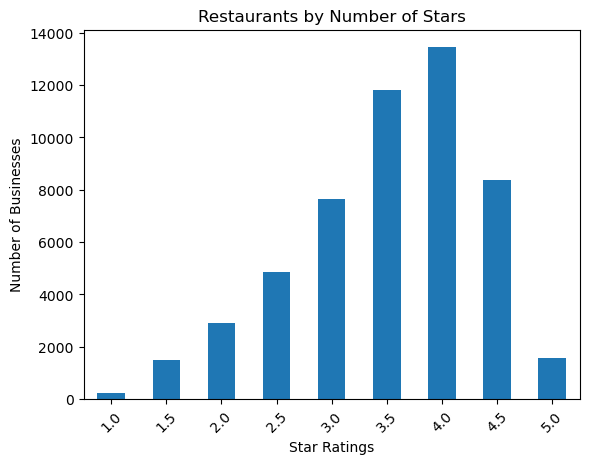

In [25]:
# plot as bar chart
rest_by_stars.plot(kind='bar')
plt.title('Restaurants by Number of Stars')
plt.xlabel('Star Ratings')
plt.ylabel('Number of Businesses')
plt.xticks(rotation=45)
plt.show()

##### expanding business attributes

In [ ]:
# Expaning attributes column
# Normalize the 'attributes' column
attributes_df = pd.json_normalize(business_df['attributes'])

# Merge the expanded columns back to the original DataFrame
business_df_expanded = business_df.drop('attributes', axis=1).join(attributes_df)

In [ ]:
business_df_expanded.head()

In [ ]:
business_df_expanded.info()

##### 